<a href="https://colab.research.google.com/github/Polyakri/projects/blob/main/MachineLearningProjects/RockPaperScissors_Game/2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the nessecary libraries

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import joblib
import cv2

from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load the data

Depending on what i wanted to do i picked different datasets

In [ ]:
x_data = np.load('drive/MyDrive/MLFinalEx/NoPCA/x_data_full_flipped.npy')
y_data = np.load('drive/MyDrive/MLFinalEx/NoPCA/y_data_full_flipped.npy')

print("Shape x_data after reshape:", x_data.shape)
print("Shape y_data:", y_data.shape)

Shape x_data after reshape: (4376, 60000)
Shape y_data: (4376,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

#Perform PCA

Depending how much percentage I wanted to keep I changed the percentage value

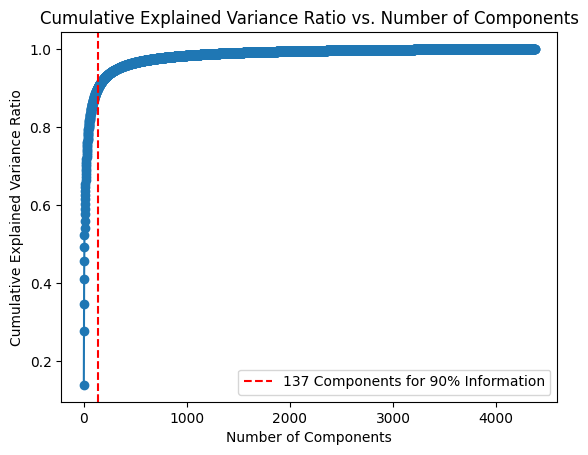

Original number of features: 60000
Number of components to retain 90% of information: 137
Transformed training data shape: (3500, 137)
Transformed testing data shape: (876, 137)


In [ ]:
# Create PCA instance
percentage = 0.9

pca = PCA()

# Fit the data and compute the cumulative explained variance ratio
pca.fit(x_data)
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to retain 90% of the information
num_components = np.argmax(explained_variance_ratio_cumsum >= percentage) + 1

# Apply PCA with the determined number of components to both X_train and X_test
pca = PCA(n_components=num_components)
X_train_transformed = pca.fit_transform(x_train)
X_test_transformed = pca.transform(x_test)

plt.plot(explained_variance_ratio_cumsum, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.axvline(x=num_components, color='r', linestyle='--', label=f'{num_components} Components for 90% Information')
plt.legend()
plt.show()


# Print the result or use X_train_transformed and X_test_transformed as needed
print("Original number of features:", x_train.shape[1])
print("Number of components to retain 90% of information:", num_components)
print("Transformed training data shape:", X_train_transformed.shape)
print("Transformed testing data shape:", X_test_transformed.shape)

Save the data

In [ ]:
directory_path = 'drive/MyDrive/MLFinalEx/PCA_90'

np.save(os.path.join(directory_path, 'x_train_full_flipped_transformed.npy'), X_train_transformed)

# Save x_test_transformed
np.save(os.path.join(directory_path, 'x_test_full_flipped_transformed.npy'), X_test_transformed)

# Save y_train
np.save(os.path.join(directory_path, 'y_train_full_flipped_original.npy'), y_train)

# Save y_test
np.save(os.path.join(directory_path, 'y_test_full_flipped_original.npy'), y_test)

joblib.dump(pca, os.path.join(directory_path, 'pca_model_flipped.joblib'))

['drive/MyDrive/MLFinalEx/PCA_90/pca_model_flipped.joblib']